<a href="https://colab.research.google.com/github/xaviermarcio/estudos-inteligencia-artificial/blob/main/02-regressao/regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📒 Regressão Linear — Notebook Didático

Este notebook foi escrito para ser **didático** e **autoexplicativo**, ideal para portfólio.
Ele demonstra um fluxo completo de um problema de **regressão** usando um dataset de preços de imóveis.

> **O que você vai ver aqui:** importação de bibliotecas, leitura dos dados, exploração inicial,
separação treino/teste, treinamento do modelo, avaliação com métricas e gráficos, além de comentários
sobre próximos passos.


## 1️⃣ Importando bibliotecas — o que cada uma faz

In [17]:
# ============================
# 1️⃣ Importando bibliotecas
# ============================
from math import sqrt
# Manipulação de dados em tabelas (DataFrames). Essencial para ler CSVs e tratar colunas/linhas.
import pandas as pd
# Operações matemáticas/vetorizadas rápidas (arrays, estatísticas, etc.).
import numpy as np
# Modelos e ferramentas de Machine Learning.
from sklearn.linear_model import LinearRegression, Ridge, Lasso  # Modelos de regressão
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Métricas de avaliação
from sklearn.preprocessing import StandardScaler  # Padronização de features (média=0, desvio=1)
# Visualização de resultados (gráficos). *Atenção:* não definimos estilos ou cores específicas.
import matplotlib.pyplot as plt


## 2️⃣ Carregando o dataset e entendendo sua estrutura

In [18]:
# Caminho do arquivo CSV (mantido no mesmo diretório deste notebook)
df = pd.read_csv("/content/regressao_precos_imoveis.csv")

# Dimensão do dataset: (linhas, colunas)
print("Formato do dataset:", df.shape)

# Visualizar as primeiras linhas para entender as colunas disponíveis
df.head()

Formato do dataset: (1200, 11)


,area_m2,quartos,banheiros,vagas,idade_imovel_anos,dist_centro_km,nota_bairro,luxo,studio,preco_mil_reais,split
0,79.4,3,3,2,20.3,11.15,10.00,1,0,918.74,train
1,58.9,3,2,1,18.8,9.55,7.76,0,0,694.78,train
2,90.2,4,3,1,17.8,8.43,6.89,0,0,860.30,train
3,55.3,3,2,2,6.9,0.50,7.64,0,0,807.35,train
4,66.9,2,1,0,12.4,0.50,6.55,0,0,726.54,train


## 3️⃣ Exploração rápida dos dados (EDA)

In [19]:
# Resumo estatístico das colunas numéricas
df.describe()

,area_m2,quartos,banheiros,vagas,idade_imovel_anos,dist_centro_km,nota_bairro,luxo,studio,preco_mil_reais
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,79.669417,2.500833,1.968333,0.995000,15.306167,8.016242,7.063417,0.178333,0.016667,766.779233
std,24.100781,1.139919,0.824356,0.808612,9.370940,3.904767,1.508360,0.382953,0.128072,176.907269
min,30.000000,1.000000,1.000000,0.000000,0.000000,0.500000,1.000000,0.000000,0.000000,268.140000
25%,62.975000,1.000000,1.000000,0.000000,8.300000,5.210000,6.077500,0.000000,0.000000,651.372500
50%,80.100000,2.000000,2.000000,1.000000,14.800000,8.005000,7.050000,0.000000,0.000000,761.395000
75%,95.400000,4.000000,3.000000,2.000000,21.400000,10.487500,8.130000,0.000000,0.000000,881.997500
max,159.500000,4.000000,3.000000,2.000000,49.500000,21.080000,10.000000,1.000000,1.000000,1398.160000


In [20]:
# Conferindo tipos de dados e valores ausentes (se houver)
print(df.dtypes)
print("\nValores ausentes por coluna:")
print(df.isna().sum())

area_m2              float64
quartos                int64
banheiros              int64
vagas                  int64
idade_imovel_anos    float64
dist_centro_km       float64
nota_bairro          float64
luxo                   int64
studio                 int64
preco_mil_reais      float64
split                 object
dtype: object

Valores ausentes por coluna:
area_m2              0
quartos              0
banheiros            0
vagas                0
idade_imovel_anos    0
dist_centro_km       0
nota_bairro          0
luxo                 0
studio               0
preco_mil_reais      0
split                0
dtype: int64


## 4️⃣ Separando em treino e teste

In [22]:
# Neste dataset já existe a coluna 'split' marcando 80% para treino e 20% para teste.
train = df[df["split"] == "train"].drop(columns=["split"])
test  = df[df["split"] == "test"].drop(columns=["split"])

# Features (X) e alvo (y)
X_train = train.drop(columns=["preco_mil_reais"])
y_train = train["preco_mil_reais"]
X_test  = test.drop(columns=["preco_mil_reais"])
y_test  = test["preco_mil_reais"]

print("Tamanhos — X_train:", X_train.shape, "| X_test:", X_test.shape)

Tamanhos — X_train: (960, 9) | X_test: (240, 9)


## 5️⃣ Baseline — Regressão Linear

In [25]:
# Criamos um modelo simples de Regressão Linear.
# Objetivo: ter um ponto de partida (baseline) para comparar depois com outras técnicas.
lr = LinearRegression()
lr.fit(X_train, y_train)

# Previsões no conjunto de teste
pred_lr = lr.predict(X_test)

# Métricas de avaliação
mae_lr = mean_absolute_error(y_test, pred_lr)          # Erro absoluto médio
rmse_lr = sqrt(mean_squared_error(y_test, pred_lr))    # Raiz do erro quadrático médio
r2_lr = r2_score(y_test, pred_lr)                      # Coeficiente de determinação (0 a 1)

print(f"Baseline – LinearRegression | MAE: {mae_lr:.2f} | RMSE: {rmse_lr:.2f} | R²: {r2_lr:.3f}")

Baseline – LinearRegression | MAE: 30.66 | RMSE: 39.32 | R²: 0.951


## 6️⃣ Visualização — Real vs. Previsto

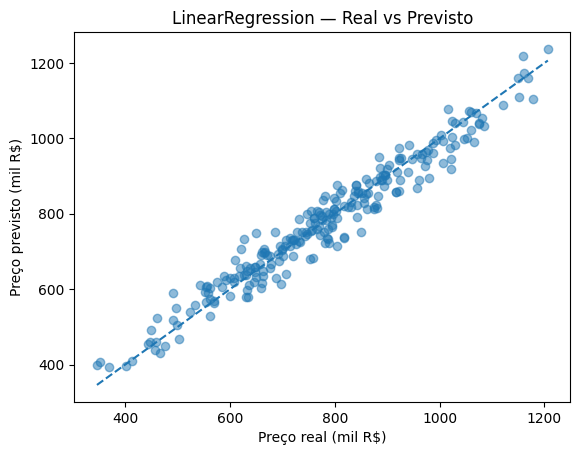

In [26]:
# Gráfico de dispersão para comparar valores reais vs previstos.
# Quanto mais os pontos estiverem próximos da reta tracejada, melhor o ajuste do modelo.
plt.figure()
plt.scatter(y_test, pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--')
plt.xlabel('Preço real (mil R$)')
plt.ylabel('Preço previsto (mil R$)')
plt.title('LinearRegression — Real vs Previsto')
plt.show()

## 7️⃣ (Opcional) Padronização + Regularização (Ridge e Lasso)

In [28]:
# Em muitos cenários, padronizar as features ajuda modelos com penalização (Ridge/Lasso).
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

# Ridge (L2) e Lasso (L1) ajudam a controlar overfitting e, no caso do Lasso, podem zerar coeficientes.
ridge = Ridge(alpha=1.0).fit(X_train_s, y_train)
lasso = Lasso(alpha=0.001, max_iter=10000).fit(X_train_s, y_train)

pred_ridge = ridge.predict(X_test_s)
pred_lasso = lasso.predict(X_test_s)

def report(y_true, y_pred, name):
    mae = mean_absolute_error(y_true, y_pred)  # Erro absoluto médio
    rmse = sqrt(mean_squared_error(y_true, y_pred))  # Raiz do erro quadrático médio
    r2 = r2_score(y_true, y_pred)  # Coeficiente de determinação
    print(f"{name} | MAE: {mae:.2f} | RMSE: {rmse:.2f} | R²: {r2:.3f}")

report(y_test, pred_ridge, "Ridge")
report(y_test, pred_lasso, "Lasso")

Ridge | MAE: 30.68 | RMSE: 39.34 | R²: 0.951
Lasso | MAE: 30.66 | RMSE: 39.32 | R²: 0.951


## 8️⃣ Diagnóstico — Resíduos

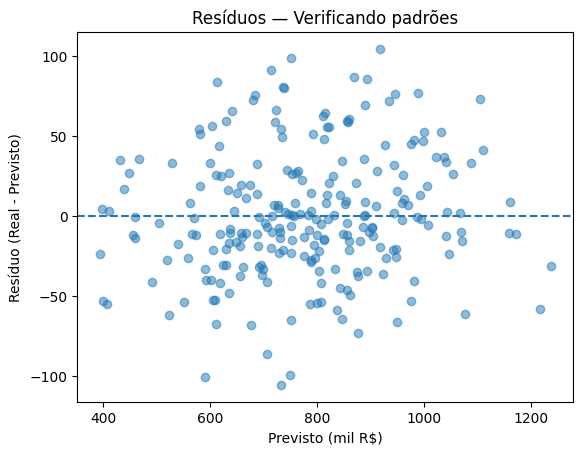

In [29]:
# Resíduos = (real - previsto). Em um bom ajuste linear, espera-se distribuição aleatória (sem padrão).
residuos = y_test - pred_lr
plt.figure()
plt.scatter(pred_lr, residuos, alpha=0.5)
plt.axhline(0, linestyle='--')
plt.xlabel('Previsto (mil R$)')
plt.ylabel('Resíduo (Real - Previsto)')
plt.title('Resíduos — Verificando padrões')
plt.show()

## 9️⃣ Próximos passos (ideias para evoluir o projeto)
- Testar modelos não lineares (ex.: **RandomForestRegressor**, **GradientBoosting**, **XGBoost**).
- Criar **novas features** (interações, termos quadráticos, log da área, etc.).
- Validar com **cross-validation** para reduzir variância na avaliação.
- Avaliar **importância das variáveis** (em modelos de árvore) para entender quais fatores pesam mais no preço.
- Analisar outliers e possíveis transformações do alvo (ex.: log).

---

> **Resumo:** Este notebook prioriza **clareza e explicação**.
Cada seção começa dizendo *o que vai acontecer*, e o código contém comentários sobre **por que** e **para que** cada passo é feito.
Isso ajuda quem visita seu portfólio a entender seu raciocínio e seu processo de estudo.
